In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm
import lmdiag
plt.style.use('seaborn')

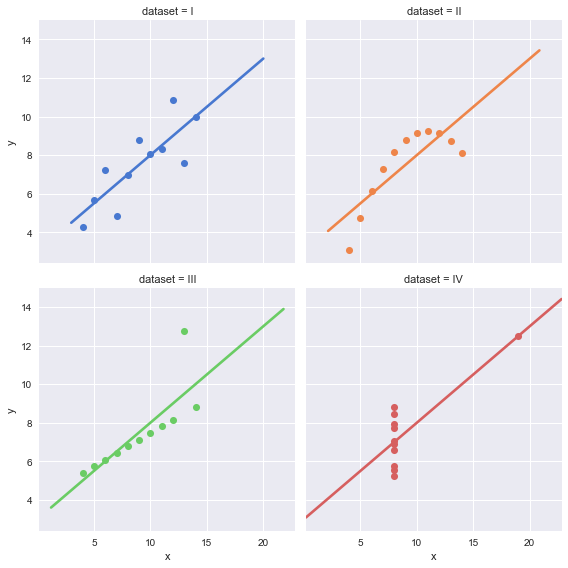

In [2]:
df = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

In [3]:
df1 = df.loc[df.dataset == 'I', ['x', 'y']]
df2 = df.loc[df.dataset == 'II', ['x', 'y']]
df3 = df.loc[df.dataset == 'III', ['x', 'y']]
df4 = df.loc[df.dataset == 'IV', ['x', 'y']]

In [4]:
# verify the stats
pairs = (df1.x, df1.y), (df2.x, df2.y), (df3.x, df3.y), (df4.x, df4.y)
for x, y in pairs:
    print('mean_y=%1.2f, mean_x=%1.2f, std_y=%1.2f, std_x=%1.2f, r=%1.2f' % (np.mean(y),np.mean(x), np.std(y), np.std(x), np.corrcoef(x, y)[0][1]) )

mean_y=7.50, mean_x=9.00, std_y=1.94, std_x=3.16, r=0.82
mean_y=7.50, mean_x=9.00, std_y=1.94, std_x=3.16, r=0.82
mean_y=7.50, mean_x=9.00, std_y=1.94, std_x=3.16, r=0.82
mean_y=7.50, mean_x=9.00, std_y=1.94, std_x=3.16, r=0.82


In [5]:
slope, intercept, r_value, p_value, std_err = linregress(df1.x, df1.y)
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
slope, intercept, r_value, p_value, std_err = linregress(df2.x, df2.y)
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
slope, intercept, r_value, p_value, std_err = linregress(df3.x, df3.y)
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
slope, intercept, r_value, p_value, std_err = linregress(df4.x, df4.y)
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))

0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.817 0.002 0.118


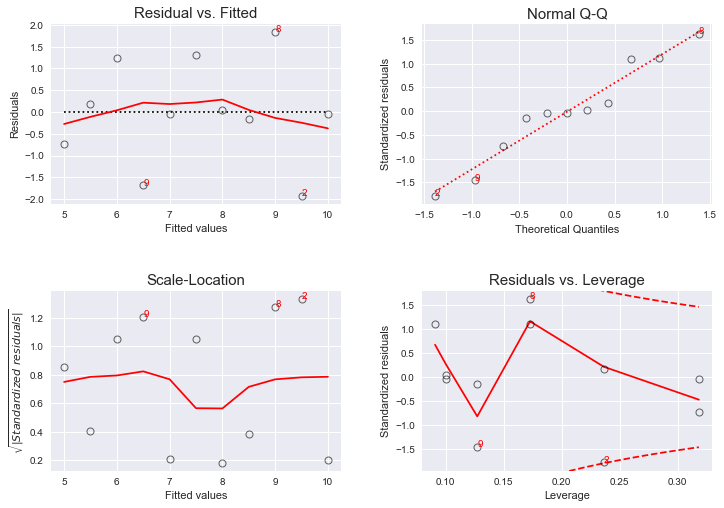

In [6]:
predictor = df1.x
response = df1.y
X = sm.add_constant(predictor)
lm = sm.OLS(response, X).fit()

plt.figure(figsize=(10,7))
lmdiag.plot(lm);
plt.show()

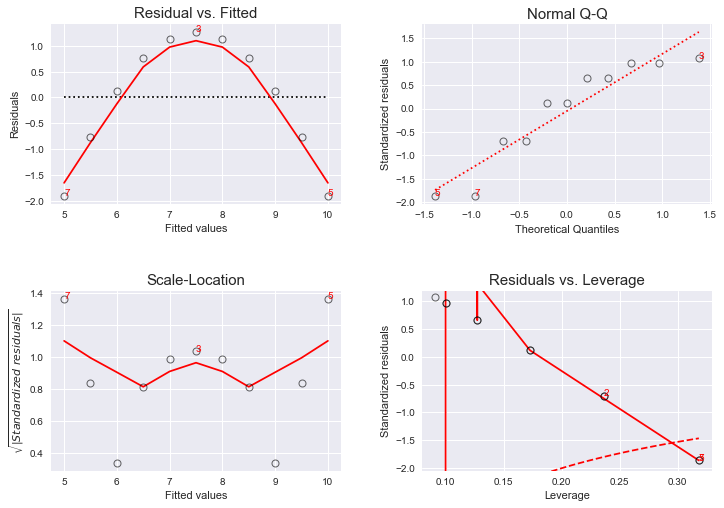

In [7]:
predictor = df2.x
response = df2.y
X = sm.add_constant(predictor)
lm = sm.OLS(response, X).fit()

plt.figure(figsize=(10,7))
lmdiag.plot(lm);
plt.show()

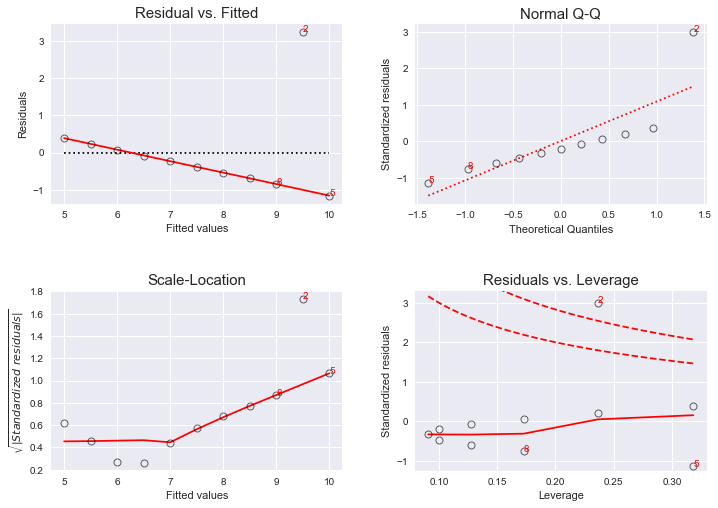

In [8]:
predictor = df3.x
response = df3.y
X = sm.add_constant(predictor)
lm = sm.OLS(response, X).fit()

plt.figure(figsize=(10,7))
lmdiag.plot(lm);
plt.show()

In [9]:
df3.iloc[2,:]

x    13.00
y    12.74
Name: 24, dtype: float64

In [10]:
df3 = df3[df3.index != 24]

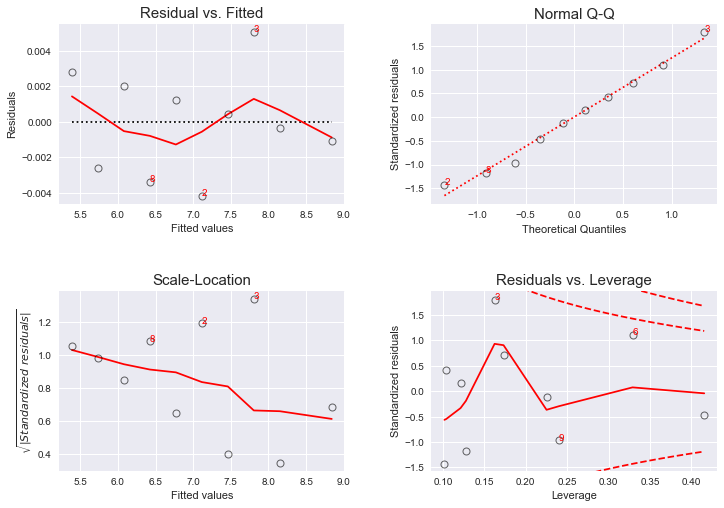

In [11]:
predictor = df3.x
response = df3.y
X = sm.add_constant(predictor)
lm = sm.OLS(response, X).fit()

plt.figure(figsize=(10,7))
lmdiag.plot(lm);
plt.show()

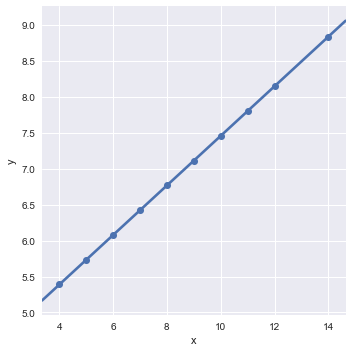

In [12]:
sns.lmplot(x="x", y="y", data=df3, scatter_kws={"s": 50, "alpha": 1})
plt.show()

In [13]:
predictor = df4.x
response = df4.y
X = sm.add_constant(predictor)
lm = sm.OLS(response, X).fit()

# plt.figure(figsize=(10,7))
# lmdiag.plot(lm);
# plt.show()

# Python code (without libraries)

# Preparing for Diagnostic Plots

In [14]:
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [15]:
def preparing_diag_plots(model_fit):
    # fitted values (need a constant term for intercept)
    model_fitted_y = model_fit.fittedvalues

    # model residuals
    model_residuals = model_fit.resid

    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal

    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

    # absolute residuals
    model_abs_resid = np.abs(model_residuals)

    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag

    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    return (model_fitted_y, 
        model_residuals, 
        model_norm_residuals,
        model_norm_residuals_abs_sqrt,
        model_abs_resid,
        model_leverage,
        model_cooks)
#     return (model_fitted_y, model_residuals, model_norm_residuals, model_norm_residuals_abs_sqrt, model_abs_resid,model_leverage, model_cooks)

In [16]:
def residuals_vs_fitted(df, model_fitted_y, model_abs_resid, model_residuals):
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'y', data=df, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]

    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i, 
                                   xy=(model_fitted_y[i], 
                                       model_residuals[i]));

In [17]:
def q_q(model_norm_residuals):
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]

    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i, 
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]));

In [18]:
def scale_location(model_fitted_y,model_norm_residuals_abs_sqrt ):
    plot_lm_3 = plt.figure(3)
    plot_lm_3.set_figheight(8)
    plot_lm_3.set_figwidth(12)

    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

    for i in abs_sq_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i, 
                                   xy=(model_fitted_y[i], 
                                       model_norm_residuals_abs_sqrt[i]));

In [19]:
def leverage(model_leverage,model_norm_residuals, model_cooks, model_fit ):
    plot_lm_4 = plt.figure(4)
    plot_lm_4.set_figheight(8)
    plot_lm_4.set_figwidth(12)

    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_4.axes[0].set_xlim(0, 0.20)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i, 
                                   xy=(model_leverage[i], 
                                       model_norm_residuals[i]))

    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(model_fit.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line
    plt.legend(loc='upper right');

# Diagnostic plots for firts dataframe

In [20]:
model = smf.ols(formula='y~x', data=df1)
model_fit = model.fit()

In [21]:
model_fitted_y, model_residuals, model_norm_residuals,model_norm_residuals_abs_sqrt,model_abs_resid,model_leverage,model_cooks = preparing_diag_plots(model_fit)

## 1. Residual plot

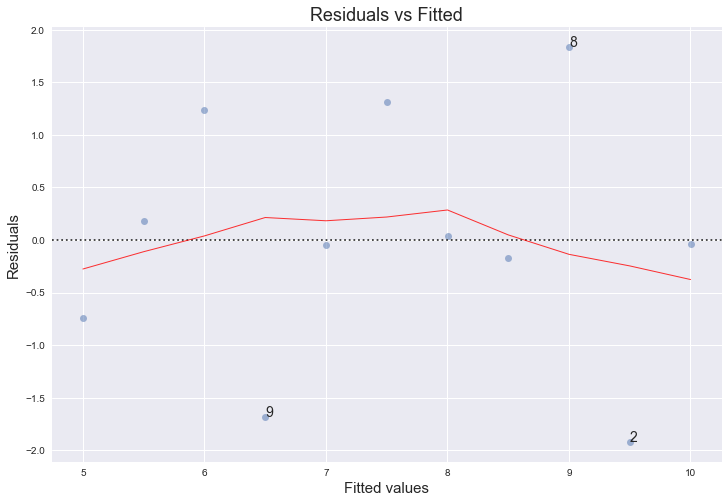

In [22]:
residuals_vs_fitted(df=df1, model_abs_resid=model_abs_resid, model_fitted_y=model_fitted_y, model_residuals=model_residuals)

## 2. QQ plot

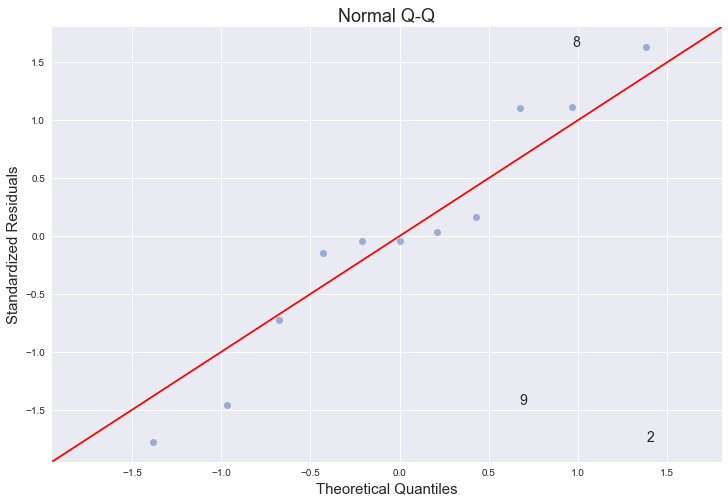

In [23]:
q_q(model_norm_residuals=model_norm_residuals)

## 3. Scale-Location Plot

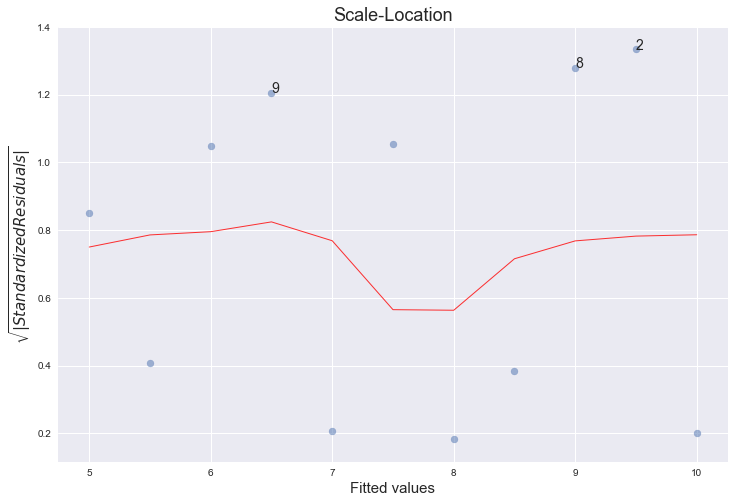

In [24]:
scale_location(model_fitted_y=model_fitted_y, model_norm_residuals_abs_sqrt=model_norm_residuals_abs_sqrt)

## 4. Leverage plot

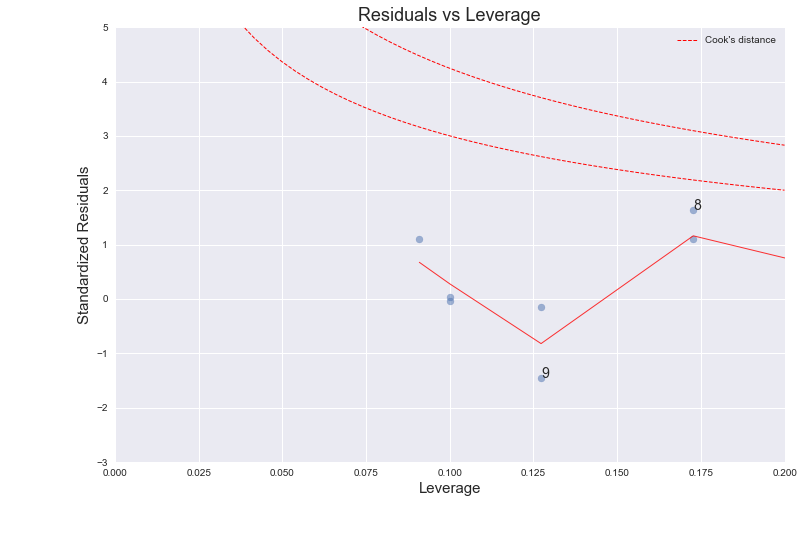

In [25]:
leverage(model_cooks=model_cooks, model_fit=model_fit, model_leverage=model_leverage, model_norm_residuals=model_norm_residuals)

# Diagnostic plots for second dataframe

In [26]:
model = smf.ols(formula='y~x', data=df4)
model_fit = model.fit()

In [27]:
model_fitted_y, model_residuals, model_norm_residuals,model_norm_residuals_abs_sqrt,model_abs_resid,model_leverage,model_cooks = preparing_diag_plots(model_fit)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: invalid value encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:417: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


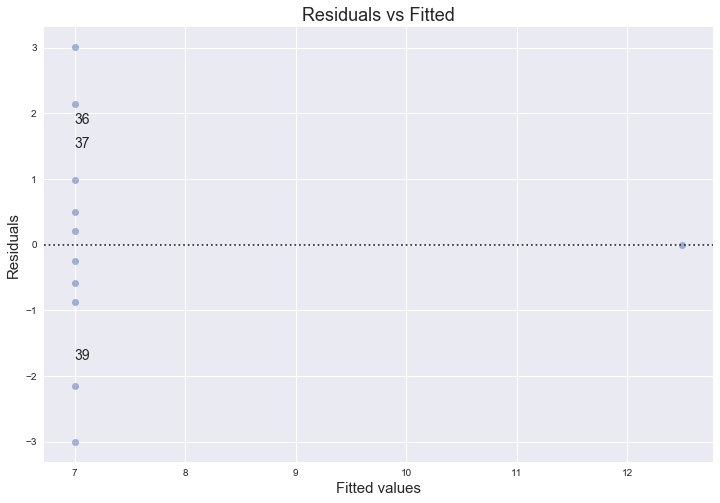

In [28]:
residuals_vs_fitted(df=df1, model_abs_resid=model_abs_resid, model_fitted_y=model_fitted_y, model_residuals=model_residuals)

In [29]:
# q_q(model_norm_residuals=model_norm_residuals)

In [35]:
# scale_location(model_fitted_y=model_fitted_y, model_norm_residuals_abs_sqrt=model_norm_residuals_abs_sqrt)

In [37]:
# leverage(model_cooks=model_cooks, model_fit=model_fit, model_leverage=model_leverage, model_norm_residuals=model_norm_residuals)